In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
interim_dir = "../data/interim"
processed_dir = "../data/processed"
data_model_file = os.path.join(processed_dir, "data_model_output.csv")

In [3]:
data_model_df = pd.read_csv(data_model_file)
df = data_model_df[(data_model_df['is_completed'] == 1) & (data_model_df['record_type_synthetic'] == 0) & (data_model_df['initial_etc_check']==True) & (data_model_df['marketsegment_label']=='PASSENGER')]

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_34208\2318029875.py:1: DtypeWarning: Columns (1,12,13,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,53,54,58,64,69,73,76,77,79,81,82,85,92,94,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,131,141,146,149,150,151,154,155,156,166,168,176,178,193,194,195,198,207,208,213,220,236,238,239,240,241,242,243,245,247,248,272,282,283,284,287,290,291,294,295,296,298,299,334,336,337,339,409,412) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model_df = pd.read_csv(data_model_file)


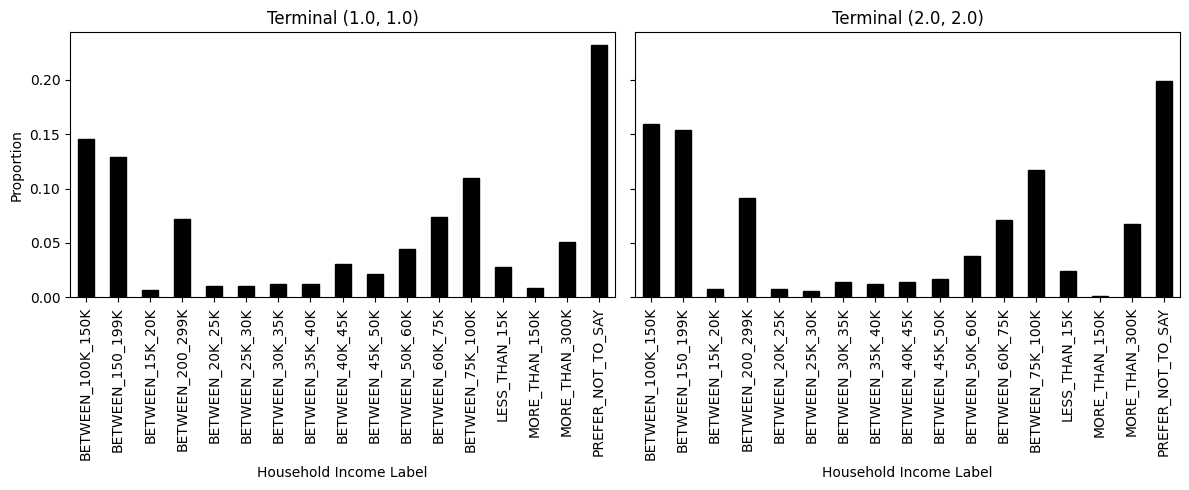

In [4]:
# Compute proportions for each terminal
income_distribution = (
    df.groupby(["airport_terminal", "household_income_label"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

# Create two separate bar charts for each terminal
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for i, terminal in enumerate(income_distribution.index):
    income_distribution.loc[terminal].plot(
        kind="bar", 
        ax=axes[i], 
        color="black",  # Single color for all bars
        edgecolor="black"
    )
    
    axes[i].set_title(f"Terminal {terminal}")
    axes[i].set_xlabel("Household Income Label")
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=90)  # Keep labels horizontal

plt.tight_layout()
plt.show()